In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
regions = pd.read_csv('noc_regions.csv')
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [3]:
regions.describe()

,NOC,region,notes
count,230,227,21
unique,230,206,21
top,TLS,Germany,Refugee Olympic Team
freq,1,4,1


In [4]:
events = pd.read_csv('athlete_events.csv')
events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
events.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [6]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [7]:
#Merging the 2 datasets together
data = pd.merge(events, regions, on='NOC', how='left')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [8]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [9]:
#Extracting the Summer Olympics only
summerdata = data[(data.Season == 'Summer')]
summerdata.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


In [10]:
#Extracting the medal winners only, removing the NaN 
medalsummerdata = summerdata[summerdata["Medal"].isnull() == False]
medalsummerdata.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN


In [11]:
#Cleaning the Height column by removing the NaN
medalsummerdata1 = medalsummerdata[medalsummerdata["Height"].isnull() == False]
medalsummerdata1.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
50,17,Paavo Johannes Aaltonen,M,32.0,175.0,64.0,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze,Finland,NaN


In [12]:
#Cleaning the Weight column by removing the NaN
medalsummerdata2 = medalsummerdata1[medalsummerdata1["Weight"].isnull() == False]
medalsummerdata2.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
50,17,Paavo Johannes Aaltonen,M,32.0,175.0,64.0,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze,Finland,NaN


In [13]:
#Cleaning the Age column by removing the NaN
medalsummerdata3 = medalsummerdata2[medalsummerdata2["Age"].isnull() == False]
medalsummerdata3.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
50,17,Paavo Johannes Aaltonen,M,32.0,175.0,64.0,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze,Finland,NaN


In [14]:
medalsummerdata3.describe()

,ID,Age,Height,Weight,Year
count,25341.000000,25341.000000,25341.000000,25341.000000,25341.000000
mean,70096.563829,25.317391,178.030307,73.940294,1987.042737
std,38944.588897,5.121130,11.252503,15.353146,23.455194
min,17.000000,13.000000,136.000000,28.000000,1896.000000
25%,37019.000000,22.000000,170.000000,63.000000,1972.000000
50%,69870.000000,25.000000,178.000000,73.000000,1992.000000
75%,104161.000000,28.000000,185.000000,83.000000,2004.000000
max,135563.000000,66.000000,223.000000,182.000000,2016.000000


In [15]:
#Top 20 countries with medals
medalsummerdata3.region.value_counts().reset_index(name='Medal').head(20)

,index,Medal
0,USA,3875
1,Russia,2924
2,Germany,2609
3,Australia,1196
4,UK,994
5,China,910
6,Italy,878
7,France,859
8,Hungary,785
9,Japan,781


In [16]:
#Top 20 Sport with medals
medalsummerdata3.Sport.value_counts().reset_index(name='Medal').head(20)

,index,Medal
0,Athletics,3648
1,Swimming,2486
2,Rowing,2104
3,Hockey,1168
4,Gymnastics,1161
5,Fencing,1109
6,Football,1084
7,Canoeing,1041
8,Basketball,1000
9,Wrestling,967


In [17]:
gdp = pd.read_excel('w_gdp.xls')
gdp.head()

,Country Name,NOC,1960,1961,1962,1963,1964,1965,1966,1967,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,United States,USA,5.433000e+11,5.633000e+11,6.051000e+11,6.386000e+11,6.858000e+11,7.437000e+11,8.150000e+11,8.617000e+11,...,1.471858e+13,1.441874e+13,1.496437e+13,1.551793e+13,1.615526e+13,1.669152e+13,1.739310e+13,1.812071e+13,1.862448e+13,NaN
1,European Union,EUU,3.589415e+11,3.907915e+11,4.269104e+11,4.702995e+11,5.212003e+11,5.675934e+11,6.152870e+11,6.611703e+11,...,1.913667e+13,1.710146e+13,1.699273e+13,1.835258e+13,1.729020e+13,1.802688e+13,1.863242e+13,1.641070e+13,1.648734e+13,NaN
2,China,CHN,5.971647e+10,5.005687e+10,4.720936e+10,5.070680e+10,5.970834e+10,7.043627e+10,7.672029e+10,7.288163e+10,...,4.598206e+12,5.109954e+12,6.100620e+12,7.572554e+12,8.560547e+12,9.607224e+12,1.048237e+13,1.106467e+13,1.119915e+13,NaN
3,Japan,JPN,4.430734e+10,5.350862e+10,6.072302e+10,6.949813e+10,8.174901e+10,9.095028e+10,1.056281e+11,1.237819e+11,...,5.037908e+12,5.231383e+12,5.700098e+12,6.157460e+12,6.203213e+12,5.155717e+12,4.848733e+12,4.383076e+12,4.940159e+12,NaN
4,Germany,DEU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.752366e+12,3.418005e+12,3.417095e+12,3.757698e+12,3.543984e+12,3.752514e+12,3.890607e+12,3.375611e+12,3.477796e+12,NaN


In [18]:
#Bring the Years into a single column
gdp = pd.melt(gdp, id_vars = ['Country Name', 'NOC'], var_name = 'Year', value_name = 'GDP')

#Convert the years to numeric values
gdp['Year'] = pd.to_numeric(gdp['Year'])
gdp.head()

,Country Name,NOC,Year,GDP
0,United States,USA,1960,5.433000e+11
1,European Union,EUU,1960,3.589415e+11
2,China,CHN,1960,5.971647e+10
3,Japan,JPN,1960,4.430734e+10
4,Germany,DEU,1960,NaN


In [19]:
#Cleaning the data by removing the NaN Gdp
cleanedgdp = gdp[gdp["GDP"].isnull() == False]
cleanedgdp.head()

,Country Name,NOC,Year,GDP
0,United States,USA,1960,5.433000e+11
1,European Union,EUU,1960,3.589415e+11
2,China,CHN,1960,5.971647e+10
3,Japan,JPN,1960,4.430734e+10
5,United Kingdom,GBR,1960,7.232805e+10


In [20]:
olympics = medalsummerdata3.merge(cleanedgdp,
                                            left_on = ['NOC', 'Year'],
                                            right_on= ['NOC', 'Year'],
                                            how = 'left')

olympics.drop('Country Name', axis = 1, inplace = True)

olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,GDP
0,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN,NaN
1,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN,NaN
2,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN,NaN
3,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN,NaN
4,17,Paavo Johannes Aaltonen,M,32.0,175.0,64.0,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze,Finland,NaN,NaN


In [41]:
olympics.describe()

,ID,Age,Height,Weight,Year,GDP
count,25341.000000,25341.000000,25341.000000,25341.000000,25341.000000,1.483400e+04
mean,70096.563829,25.317391,178.030307,73.940294,1987.042737,2.635408e+12
std,38944.588897,5.121130,11.252503,15.353146,23.455194,4.304188e+12
min,17.000000,13.000000,136.000000,28.000000,1896.000000,3.957945e+08
25%,37019.000000,22.000000,170.000000,63.000000,1972.000000,1.713156e+11
50%,69870.000000,25.000000,178.000000,73.000000,1992.000000,6.858000e+11
75%,104161.000000,28.000000,185.000000,83.000000,2004.000000,2.647899e+12
max,135563.000000,66.000000,223.000000,182.000000,2016.000000,1.862448e+13


In [38]:
final = olympics[olympics["GDP"].isnull() == False]
final.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,GDP
6,37,Ann Kristin Aarnes,F,23.0,182.0,64.0,Norway,NOR,1996 Summer,1996,Summer,Atlanta,Football,Football Women's Football,Bronze,Norway,NaN,1.635178e+11
7,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze,Italy,NaN,1.858913e+12
8,63,Jos Luis Abajo Gmez,M,30.0,194.0,87.0,Spain,ESP,2008 Summer,2008,Summer,Beijing,Fencing,"Fencing Men's epee, Individual",Bronze,Spain,NaN,1.635015e+12
9,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze,Azerbaijan,NaN,3.784772e+10
10,67,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.0,80.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver,Russia,NaN,1.660844e+12


In [22]:
finaldata = final.drop(columns='notes')
finaldata.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,GDP
6,37,Ann Kristin Aarnes,F,23.0,182.0,64.0,Norway,NOR,1996 Summer,1996,Summer,Atlanta,Football,Football Women's Football,Bronze,Norway,1.635178e+11
7,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze,Italy,1.858913e+12
8,63,Jos Luis Abajo Gmez,M,30.0,194.0,87.0,Spain,ESP,2008 Summer,2008,Summer,Beijing,Fencing,"Fencing Men's epee, Individual",Bronze,Spain,1.635015e+12
9,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze,Azerbaijan,3.784772e+10
10,67,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.0,80.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver,Russia,1.660844e+12


In [23]:
medal_list = list(events.Medal)
medal_values = []
for i in range(len(medal_list)):
    if medal_list[i] == 'Gold':
        medal_values.append(1)
    elif medal_list[i] == 'Silver':
        medal_values.append(1)
    else:
        medal_values.append(1)
print(medal_values)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [24]:
df1 = pd.DataFrame(medal_values)
df1.columns = ['Medal Values']
df1.head(10)

,Medal Values
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [25]:
# Sets dataframe of single variables.
# Inputs: dataset = variable name of main datasets; var = variable name of variable to be explored.
def olympics_var(dataset, var):
    i = pd.DataFrame(dataset[var])
    print(dataset[var].head())
    print(dataset[var].dtypes)
    print(len([var]))
    print(dataset[var].unique())
    if dataset[var].dtypes == "int64" or "float64":
        j = i.dropna()
        f, axes = plt.subplots(4, 1, figsize=(18, 18))
        sb.catplot(x = var, data = j, kind = 'count', height = 8, ax = axes[0])
        sb.boxplot(y = var, data = j, orient = "h", color = 'r', ax = axes[1])
        sb.distplot(j, color = 'g', ax = axes[2])
        sb.violinplot(x = var, data = j, color = 'b', ax = axes[3])
    return i

In [26]:
def bmi(weight, height):
    bmi = pd.DataFrame(data = weight.values / ((height.values/100) * (height.values/100)), columns = ['BMI'])
    print(bmi.head(15))
    return bmi

0    175.0
1    175.0
2    175.0
3    175.0
4    175.0
Name: Height, dtype: float64
float64
1
[175. 189. 182. 198. 194. 165. 179. 180. 185. 186. 181. 163. 190. 188.
 187. 184. 191. 170. 173. 169. 160. 167. 202. 166. 159. 172. 161. 197.
 192. 183. 171. 168. 178. 148. 150. 176. 158. 174. 162. 164. 193. 147.
 195. 154. 156. 177. 201. 200. 157. 207. 203. 155. 215. 152. 196. 211.
 204. 199. 139. 208. 142. 214. 153. 143. 210. 205. 206. 223. 216. 149.
 151. 209. 213. 144. 140. 146. 136. 138. 145. 217. 218. 141. 212. 219.
 220. 137.]


C:\Users\teren\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


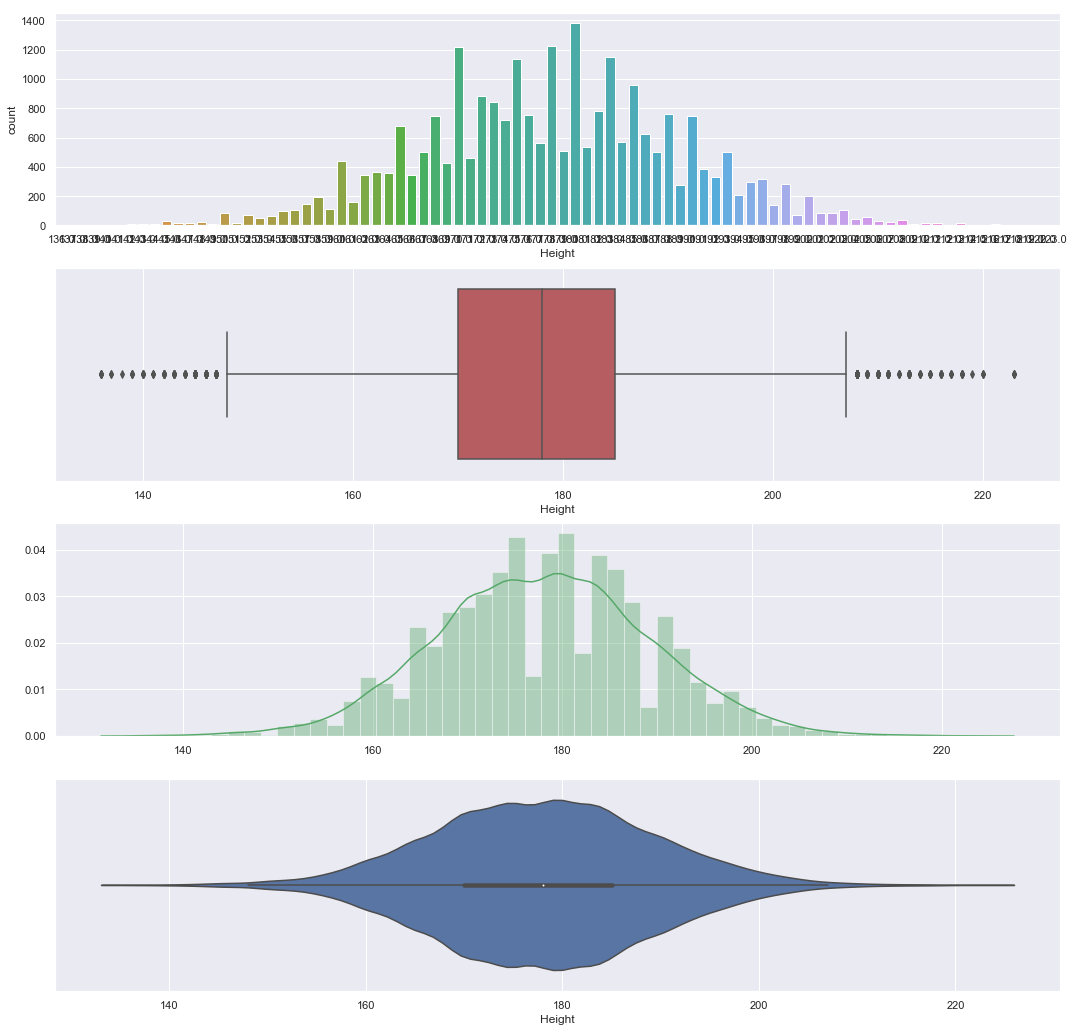

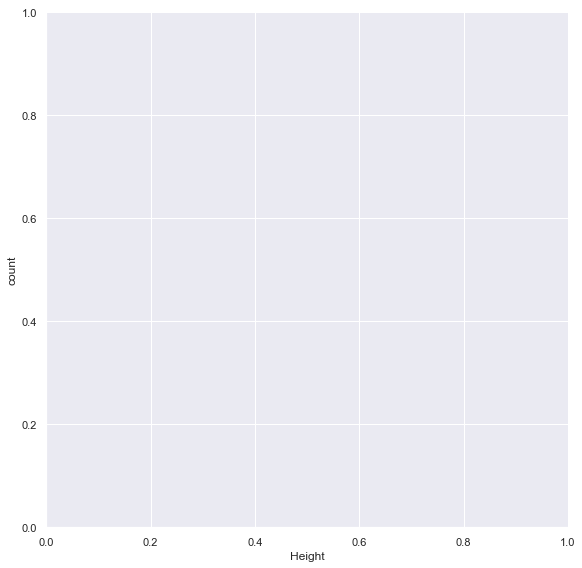

In [27]:
olympics_height = olympics_var(olympics, "Height")

0    64.0
1    64.0
2    64.0
3    64.0
4    64.0
Name: Weight, dtype: float64
float64
1
[ 64.   72.   90.   87.   49.   80.   83.   86.   82.   55.   67.   60.
  85.   79.   96.   97.   88.   56.   59.   91.   62.   63.  104.   84.
 125.   50.   48.   58.   78.   40.   68.   92.   75.   61.   89.   93.
  77.   46.   81.   52.   73.   54.   57.   51.  120.   74.   65.   70.
 100.   76.   66.   47.   69.5 102.   53.   45.  105.   95.   69.  156.
  71.  130.   98.  160.  110.  106.   44.  141.  118.  101.   94.  109.
  74.5 121.  135.  111.   39.   99.   36.  114.  132.   65.5  43.   42.
  59.5 116.  108.   35.  117.  103.   58.5  32.  113.  146.5 116.5 140.
 115.   38.  101.5 154.  136.  127.  107.  170.  126.  146.  122.   55.5
  41.  123.   34.  150.  109.5  37.   70.5  71.5  30.   76.5 112.   33.
 129.  137.   67.5 128.   54.5  63.5 134.  147.  100.5  78.5  82.5  77.5
  53.5  83.5 124.   81.5  57.5  89.5 102.5 167.   91.5  68.5  73.5  85.5
 108.5 138.  142.   60.5  66.5 135.5  31.  1

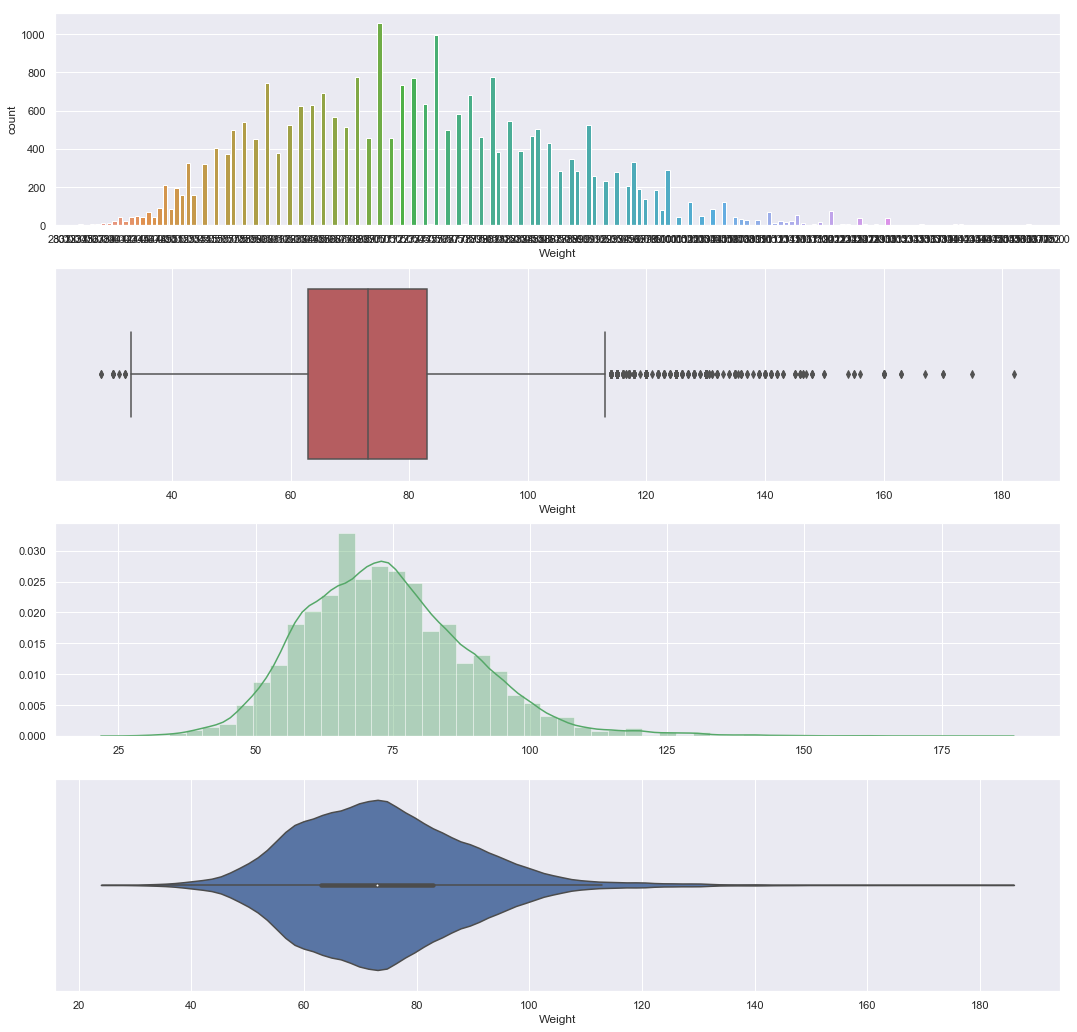

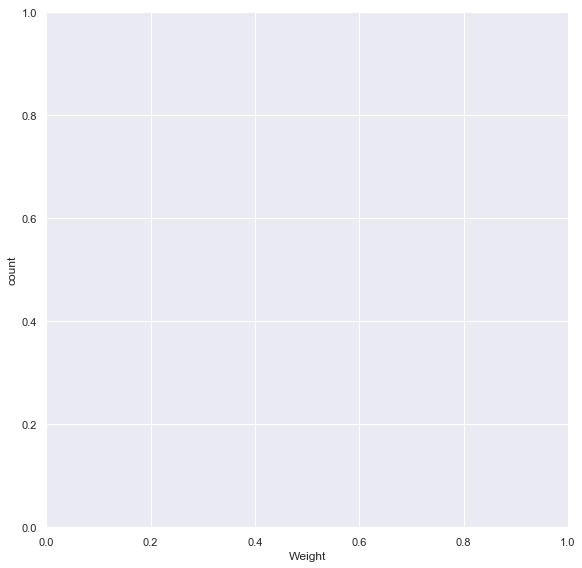

In [28]:
olympics_weight = olympics_var(olympics, "Weight")

In [29]:
bmi(olympics_weight,olympics_height)

          BMI
0   20.897959
1   20.897959
2   20.897959
3   20.897959
4   20.897959
5   20.156211
6   19.321338
7   22.956841
8   23.116165
9   17.998163
10  24.968010
11  25.617284
12  25.963048
13  25.963048
14  25.963048


,BMI
0,20.897959
1,20.897959
2,20.897959
3,20.897959
4,20.897959
5,20.156211
6,19.321338
7,22.956841
8,23.116165
9,17.998163


In [30]:
bmiathletes = bmi(olympics_weight,olympics_height)

          BMI
0   20.897959
1   20.897959
2   20.897959
3   20.897959
4   20.897959
5   20.156211
6   19.321338
7   22.956841
8   23.116165
9   17.998163
10  24.968010
11  25.617284
12  25.963048
13  25.963048
14  25.963048


In [31]:
df2 = bmiathletes
df2.head(10)

,BMI
0,20.897959
1,20.897959
2,20.897959
3,20.897959
4,20.897959
5,20.156211
6,19.321338
7,22.956841
8,23.116165
9,17.998163


In [32]:
df3 = finaldata.join(df1)

In [36]:
df3

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,GDP,Medal Values
6,37,Ann Kristin Aarnes,F,23.0,182.0,64.0,Norway,NOR,1996 Summer,1996,Summer,Atlanta,Football,Football Women's Football,Bronze,Norway,1.635178e+11,1
7,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze,Italy,1.858913e+12,1
8,63,Jos Luis Abajo Gmez,M,30.0,194.0,87.0,Spain,ESP,2008 Summer,2008,Summer,Beijing,Fencing,"Fencing Men's epee, Individual",Bronze,Spain,1.635015e+12,1
9,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze,Azerbaijan,3.784772e+10,1
10,67,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.0,80.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver,Russia,1.660844e+12,1
11,72,Aleksey Aleksandrovich Abalmasov,M,28.0,180.0,83.0,Belarus,BLR,2008 Summer,2008,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Fours, 1,000 metres",Gold,Belarus,6.076348e+10,1
12,73,Luc Abalo,M,23.0,182.0,86.0,France,FRA,2008 Summer,2008,Summer,Beijing,Handball,Handball Men's Handball,Gold,France,2.923466e+12,1
13,73,Luc Abalo,M,27.0,182.0,86.0,France,FRA,2012 Summer,2012,Summer,London,Handball,Handball Men's Handball,Gold,France,2.681416e+12,1
14,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver,France,2.465454e+12,1
15,76,Jouan Patrice Abanda Etong,M,22.0,185.0,82.0,Cameroon,CMR,2000 Summer,2000,Summer,Sydney,Football,Football Men's Football,Gold,Cameroon,1.008394e+10,1


In [42]:
df4 = df3.join(df2)

In [43]:
df4.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,GDP,Medal Values,BMI
6,37,Ann Kristin Aarnes,F,23.0,182.0,64.0,Norway,NOR,1996 Summer,1996,Summer,Atlanta,Football,Football Women's Football,Bronze,Norway,1.635178e+11,1,19.321338
7,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze,Italy,1.858913e+12,1,22.956841
8,63,Jos Luis Abajo Gmez,M,30.0,194.0,87.0,Spain,ESP,2008 Summer,2008,Summer,Beijing,Fencing,"Fencing Men's epee, Individual",Bronze,Spain,1.635015e+12,1,23.116165
9,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze,Azerbaijan,3.784772e+10,1,17.998163
10,67,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.0,80.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver,Russia,1.660844e+12,1,24.968010


In [44]:
df = df4.reset_index(drop = True)

In [45]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,GDP,Medal Values,BMI
0,37,Ann Kristin Aarnes,F,23.0,182.0,64.0,Norway,NOR,1996 Summer,1996,Summer,Atlanta,Football,Football Women's Football,Bronze,Norway,1.635178e+11,1,19.321338
1,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze,Italy,1.858913e+12,1,22.956841
2,63,Jos Luis Abajo Gmez,M,30.0,194.0,87.0,Spain,ESP,2008 Summer,2008,Summer,Beijing,Fencing,"Fencing Men's epee, Individual",Bronze,Spain,1.635015e+12,1,23.116165
3,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze,Azerbaijan,3.784772e+10,1,17.998163
4,67,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.0,80.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver,Russia,1.660844e+12,1,24.968010
5,72,Aleksey Aleksandrovich Abalmasov,M,28.0,180.0,83.0,Belarus,BLR,2008 Summer,2008,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Fours, 1,000 metres",Gold,Belarus,6.076348e+10,1,25.617284
6,73,Luc Abalo,M,23.0,182.0,86.0,France,FRA,2008 Summer,2008,Summer,Beijing,Handball,Handball Men's Handball,Gold,France,2.923466e+12,1,25.963048
7,73,Luc Abalo,M,27.0,182.0,86.0,France,FRA,2012 Summer,2012,Summer,London,Handball,Handball Men's Handball,Gold,France,2.681416e+12,1,25.963048
8,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver,France,2.465454e+12,1,25.963048
9,76,Jouan Patrice Abanda Etong,M,22.0,185.0,82.0,Cameroon,CMR,2000 Summer,2000,Summer,Sydney,Football,Football Men's Football,Gold,Cameroon,1.008394e+10,1,23.959094
